In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from models.mnist import MNIST13k
from torchsummary import summary
from utils import train, test, plot_stats, PlotOutput, get_device

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
device = get_device()
device

'cuda'

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22),], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

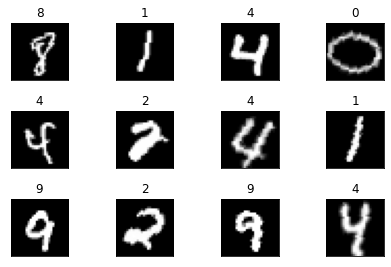

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])

In [7]:
"""
RF_out = RF_in + (kernel-1) * J_in
J_out = J_in * stride
"""

'\nRF_out = RF_in + (kernel-1) * J_in\nJ_out = J_in * stride\n'

In [9]:
model = MNIST13k().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             576
       BatchNorm2d-6            [-1, 8, 28, 28]              16
              ReLU-7            [-1, 8, 28, 28]               0
           Dropout-8            [-1, 8, 28, 28]               0
            Conv2d-9            [-1, 8, 28, 28]             576
      BatchNorm2d-10            [-1, 8, 28, 28]              16
             ReLU-11            [-1, 8, 28, 28]               0
          Dropout-12            [-1, 8, 28, 28]               0
       BasicBlock-13            [-1, 8, 28, 28]               0
       InputBlock-14            [-1, 8,

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, verbose=True)

criterion = F.cross_entropy
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, train_loader, optimizer, criterion)
    test_loss = test(model, device, test_loader, criterion)
    scheduler.step(test_loss)

Epoch 1


Train: Loss=0.1131 Batch_id=1874 Accuracy=92.70: 100%|██████████| 1875/1875 [00:23<00:00, 78.88it/s]


Test set: Average loss: 0.1175, Accuracy: 9689/10000 (96.89%)

Epoch 2


Train: Loss=0.1080 Batch_id=1874 Accuracy=96.97: 100%|██████████| 1875/1875 [00:23<00:00, 80.13it/s]


Test set: Average loss: 0.0539, Accuracy: 9850/10000 (98.50%)

Epoch 3


Train: Loss=0.0158 Batch_id=1874 Accuracy=97.53: 100%|██████████| 1875/1875 [00:23<00:00, 80.28it/s]


Test set: Average loss: 0.0473, Accuracy: 9871/10000 (98.71%)

Epoch 4


Train: Loss=0.1205 Batch_id=1874 Accuracy=97.87: 100%|██████████| 1875/1875 [00:23<00:00, 81.01it/s]


Test set: Average loss: 0.0379, Accuracy: 9895/10000 (98.95%)

Epoch 5


Train: Loss=0.0131 Batch_id=1874 Accuracy=98.07: 100%|██████████| 1875/1875 [00:24<00:00, 77.00it/s]


Test set: Average loss: 0.0263, Accuracy: 9926/10000 (99.26%)

Epoch 6


Train: Loss=0.0123 Batch_id=1874 Accuracy=98.19: 100%|██████████| 1875/1875 [00:24<00:00, 78.09it/s]


Test set: Average loss: 0.0283, Accuracy: 9912/10000 (99.12%)

Epoch 7


Train: Loss=0.0566 Batch_id=1874 Accuracy=98.32: 100%|██████████| 1875/1875 [00:23<00:00, 79.25it/s]


Test set: Average loss: 0.0360, Accuracy: 9899/10000 (98.99%)

Epoch 00007: reducing learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.0362 Batch_id=1874 Accuracy=98.71: 100%|██████████| 1875/1875 [00:23<00:00, 78.49it/s]


Test set: Average loss: 0.0164, Accuracy: 9952/10000 (99.52%)

Epoch 9


Train: Loss=0.0152 Batch_id=1874 Accuracy=98.85: 100%|██████████| 1875/1875 [00:23<00:00, 78.97it/s]


Test set: Average loss: 0.0163, Accuracy: 9953/10000 (99.53%)

Epoch 10


Train: Loss=0.0197 Batch_id=1874 Accuracy=98.98: 100%|██████████| 1875/1875 [00:23<00:00, 79.02it/s]


Test set: Average loss: 0.0149, Accuracy: 9955/10000 (99.55%)

Epoch 11


Train: Loss=0.0552 Batch_id=1874 Accuracy=98.97: 100%|██████████| 1875/1875 [00:23<00:00, 79.32it/s]


Test set: Average loss: 0.0153, Accuracy: 9954/10000 (99.54%)

Epoch 12


Train: Loss=0.0192 Batch_id=1874 Accuracy=99.02: 100%|██████████| 1875/1875 [00:23<00:00, 80.30it/s]


Test set: Average loss: 0.0148, Accuracy: 9955/10000 (99.55%)

Epoch 13


Train: Loss=0.1868 Batch_id=1874 Accuracy=98.99: 100%|██████████| 1875/1875 [00:23<00:00, 79.79it/s]


Test set: Average loss: 0.0151, Accuracy: 9957/10000 (99.57%)

Epoch 14


Train: Loss=0.0263 Batch_id=1874 Accuracy=98.96: 100%|██████████| 1875/1875 [00:23<00:00, 81.16it/s]


Test set: Average loss: 0.0146, Accuracy: 9957/10000 (99.57%)

Epoch 15


Train: Loss=0.0140 Batch_id=1874 Accuracy=99.04: 100%|██████████| 1875/1875 [00:23<00:00, 80.69it/s]


Test set: Average loss: 0.0156, Accuracy: 9950/10000 (99.50%)

Epoch 16


Train: Loss=0.0155 Batch_id=1874 Accuracy=99.02: 100%|██████████| 1875/1875 [00:23<00:00, 79.79it/s]


Test set: Average loss: 0.0162, Accuracy: 9949/10000 (99.49%)

Epoch 00016: reducing learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.0142 Batch_id=1874 Accuracy=99.08: 100%|██████████| 1875/1875 [00:23<00:00, 78.49it/s]


Test set: Average loss: 0.0142, Accuracy: 9959/10000 (99.59%)

Epoch 18


Train: Loss=0.0043 Batch_id=1874 Accuracy=99.09: 100%|██████████| 1875/1875 [00:23<00:00, 80.65it/s]


Test set: Average loss: 0.0140, Accuracy: 9958/10000 (99.58%)

Epoch 19


Train: Loss=0.0040 Batch_id=1874 Accuracy=99.03: 100%|██████████| 1875/1875 [00:23<00:00, 79.66it/s]


Test set: Average loss: 0.0137, Accuracy: 9961/10000 (99.61%)

Epoch 20


Train: Loss=0.0061 Batch_id=1874 Accuracy=99.06: 100%|██████████| 1875/1875 [00:23<00:00, 80.26it/s]


Test set: Average loss: 0.0145, Accuracy: 9958/10000 (99.58%)



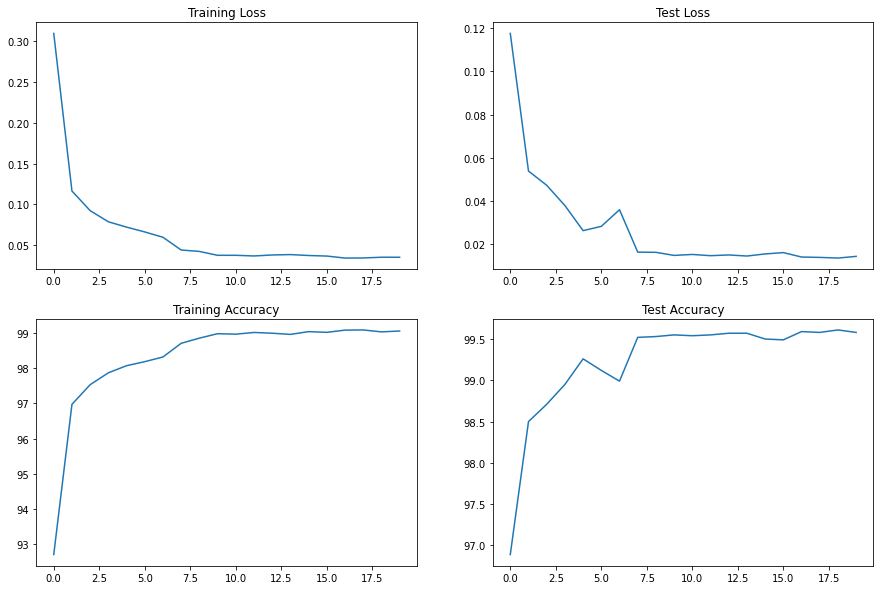

In [12]:
plot_stats()

100%|██████████| 313/313 [00:02<00:00, 146.40it/s]


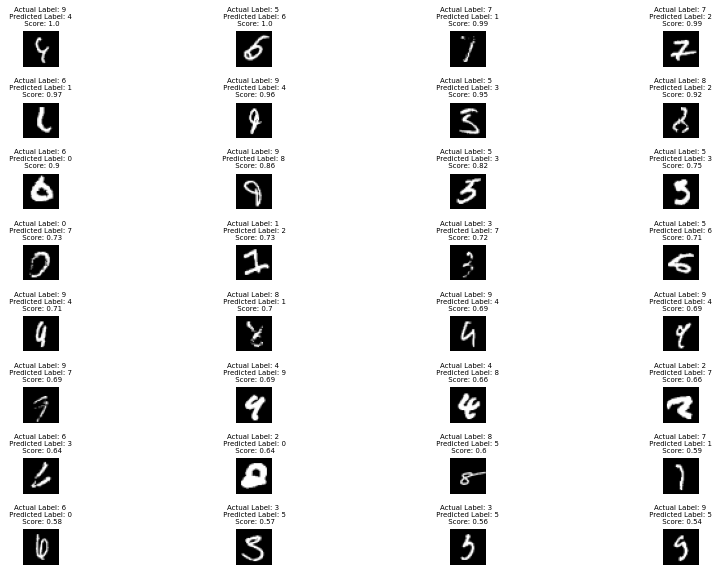

In [13]:
# plot incorrect plus very difficult classifications
p = PlotOutput(device)
p.run_prediction(model, test_loader, class_list=[0,1,2,3,4,5,6,7,8,9], ptype="incorrect")
p.plot(n=32, reverse=True)

100%|██████████| 313/313 [00:02<00:00, 146.98it/s]


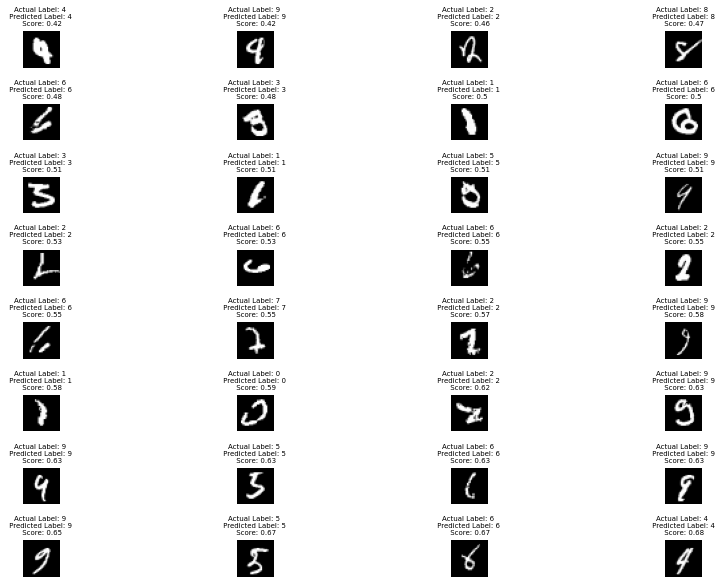

In [14]:
# plot correct yet difficult classifications
p.run_prediction(model, test_loader, class_list=[0,1,2,3,4,5,6,7,8,9], ptype="correct")
p.plot(n=32, reverse=False)